## Generate learning curves for each dataset
Figure 6 in the paper.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# from load_modules import *
import os
import sys
sys.path.append('../src')
from post_process import *

%matplotlib inline
fpath = Path(os.getcwd())
print('Current path:', fpath)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current path: /vol/ml/apartin/projects/dr-learning-curves/nbs


In [3]:
# Settings
drop_bad_r2fit = False
# drop_bad_r2fit = True
dpi = 300

## Path to data

In [4]:
fname = 'all_scores.csv'

In [5]:
src = 'GDSC1'
# src = 'GDSC2'
# src = 'CTRP'
# src = 'NCI60'

lgb_dft_label = 'dGBDT'
lgb_hpo_label = 'hGBDT'
nn0_label = 'sNN'
nn1_label = 'mNN'

dpath = fpath/'../lc.raw'

if src == 'GDSC1':
    nn0_path = Path(dpath, 'lc.gdsc1.sNN', fname)
    nn1_path = Path(dpath, 'lc.gdsc1.mNN', fname)
    lgb_path_hpo = Path(dpath, 'lc.gdsc1.hGBDT', fname)
    lgb_path_dft = Path(dpath, 'lc.gdsc1.dGBDT', fname)

if src == 'GDSC2':
    nn0_path = Path(dpath, 'lc.gdsc2.sNN', fname)
    nn1_path = Path(dpath, 'lc.gdsc2.mNN', fname)
    lgb_path_hpo = Path(dpath, 'lc.gdsc2.hGBDT', fname)
    lgb_path_dft = Path(dpath, 'lc.gdsc2.dGBDT', fname)

if src == 'CTRP':
    nn0_path = Path(dpath, 'lc.ctrp.sNN', fname)
    nn1_path = Path(dpath, 'lc.ctrp.mNN', fname)
    lgb_path_hpo = Path(dpath, 'lc.ctrp.hGBDT', fname)
    lgb_path_dft = Path(dpath, 'lc.ctrp.dGBDT', fname)

if src == 'NCI60':
    nn0_path = Path(dpath, 'lc.nci60.sNN', fname)
    nn1_path = Path(dpath, 'lc.nci60.mNN', fname)
    lgb_path_hpo = Path(dpath, 'lc.nci60.hGBDT', fname)
    lgb_path_dft = Path(dpath, 'lc.nci60.dGBDT', fname)

In [6]:
outpath = fpath/'../lc.fits/cmpr_models'
os.makedirs(outpath, exist_ok=True)

## Load data

In [7]:
lgb_dft = load_data(lgb_path_dft, tr_set='te');
lgb_hpo = load_data(lgb_path_hpo, tr_set='te');
nn0 = load_data(nn0_path, tr_set='te');
nn1 = load_data(nn1_path, tr_set='te');

In [8]:
# print_count(aa=lgb_dft)
# print_count(aa=lgb_hpo)
# print_count(aa=nn0)
# print_count(aa=nn1)

In [9]:
if drop_bad_r2fit:
    nn0 = drop_bad_r2(nn0)
    nn1 = drop_bad_r2(nn1)
    lgb_hpo = drop_bad_r2(lgb_hpo)
    lgb_dft = drop_bad_r2(lgb_dft)

In [10]:
# NCI60: remove bad samples
if src == 'NCI60':
    # np.unique(sorted(nn0.tr_size))
    nn0 = nn0[ ~nn0['tr_size'].isin([369806, 499618, 580947, 610743, 625000]) ].reset_index(drop=True)
    nn1 = nn1[ ~nn1['tr_size'].isin([369806, 499618, 580947, 610743, 625000]) ].reset_index(drop=True)

## Plot LC_raw each source

In [11]:
# Plot params
# -----------
legend_fontsize = 12
met = 'mean_absolute_error';  # startParams = {'a': 1.2, 'b': -0.4, 'c': 0.04}

t_set = 'te'
xtick_scale = 'log2'
ytick_scale = 'log2'
# xtick_scale = 'linear'
# ytick_scale = 'linear'

kwargs = {'metric_name': met,
          'tr_set': t_set,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale,
          'plot_median': True,
          'plot_shadow': False}

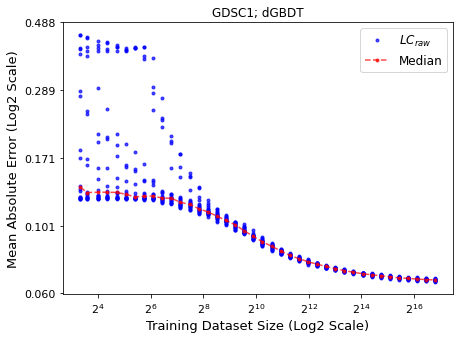

In [12]:
# Plot dGBDT (lgb_dft)
# --------------------
if lgb_dft is not None:
    kwargs.update({'title': f'{src}; {lgb_dft_label}'})
    ax = lc_plots.plot_lc_single_metric(lgb_dft, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    ax.grid(False)

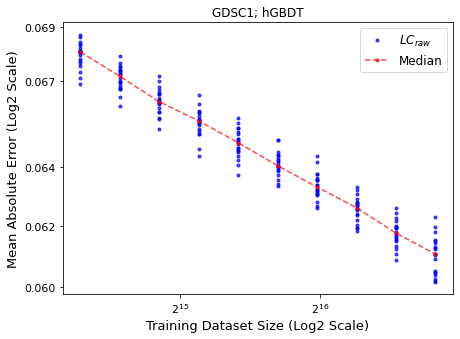

In [13]:
# Plot hGBDT (lgb_hpo)
# --------------------
if lgb_hpo is not None:
    kwargs.update({'title': f'{src}; {lgb_hpo_label}'})
    ax = lc_plots.plot_lc_single_metric(lgb_hpo, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    ax.grid(False)

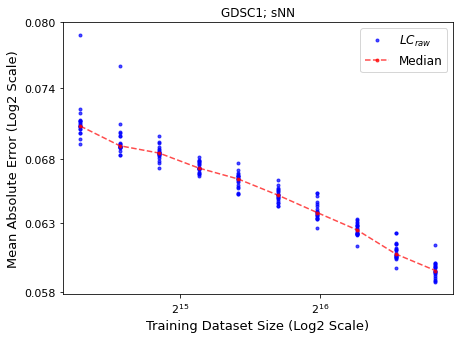

In [14]:
# Plot sNN (nn0)
# --------------
if nn0 is not None:
    kwargs.update({'title': f'{src}; {nn0_label}'})
    ax = lc_plots.plot_lc_single_metric(nn0, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    ax.grid(False)

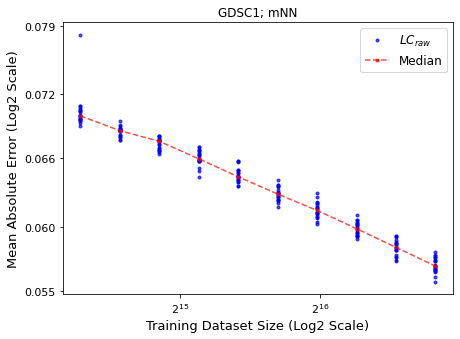

In [15]:
# Plot mNN (nn1)
# --------------
if nn1 is not None:
    kwargs.update({'title': f'{src}; {nn1_label}'})
    ax = lc_plots.plot_lc_single_metric(nn1, **kwargs);
    ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
    ax.grid(False)

## Plot LC_raw combined

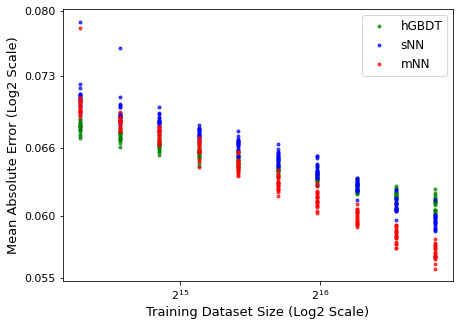

In [16]:
# Plot LC_raw combined
# --------------------
ax = None
kwargs = {'metric_name': met,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale}

# if lgb_dft is not None:
#     lgb = lgb_dft
#     lgb = lgb[ lgb.metric==met ].reset_index(drop=True)
#     ax = lc_plots.plot_lc(x=lgb['tr_size'].values, y=lgb['score'].values,
#                           color='m', label=f'{lgb_dft_label}', **kwargs, ax=ax);

if lgb_hpo is not None:
    lgb = lgb_hpo
    lgb = lgb[ lgb.metric==met ].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=lgb['tr_size'].values,
                          y=lgb['score'].values,
                          color='g', label=f'{lgb_hpo_label}', **kwargs, ax=ax);

if nn0 is not None:
    nn0 = nn0[ nn0.metric==met ].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=nn0['tr_size'].values,
                          y=nn0['score'].values,
                          color='b', label=f'{nn0_label}', **kwargs, ax=ax);

if nn1 is not None:
    nn1 = nn1[ nn1.metric==met ].reset_index(drop=True)
    ax = lc_plots.plot_lc(x=nn1['tr_size'].values,
                          y=nn1['score'].values,
                          color='r', label=f'{nn1_label}', **kwargs, ax=ax);

ax.legend(frameon=True, fontsize=legend_fontsize, loc='best');
ax.grid(False)

In [17]:
# nn0[nn0.tr_size == nn0.tr_size.max()].score.values
# nn1[nn1.tr_size == nn1.tr_size.max()].score.values

## Determine LC_f

In [18]:
# Determine LC_f
# --------------
if src == 'GDSC1':
    x_fit_mn = 10000;
    x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}

elif src == 'GDSC2':
    x_fit_mn = 10000;
    x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}
    
elif src == 'CTRP':
    x_fit_mn = 10000;
    x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}    
    
elif src == 'NCI60':    
    x_fit_mn = 100000;
    x_fit_mx = None
    startParams = {'a': 1.2, 'b': -0.3, 'c': 0.04}

# Dataframes to fit    
dfit_lgb_dft = fit_data(lgb_dft, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_lgb_hpo = fit_data(lgb_hpo, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_nn0     = fit_data(nn0, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)
dfit_nn1     = fit_data(nn1, x_fit_mn=x_fit_mn, x_fit_mx=x_fit_mx)

## Percent improve compared to baseline (dGBDT)

In [19]:
# Percent improve compared to baseline (dGBDT)
# --------------------------------------------
v_dGBDT = dfit_lgb_dft.loc[:,'y'].values[-1]
v_hGBDT = dfit_lgb_hpo.loc[:,'y'].values[-1]
v_sNN = dfit_nn0.loc[:,'y'].values[-1]
v_mNN = dfit_nn1.loc[:,'y'].values[-1]

# dGBDT
df_lgb_dft = dfit_lgb_dft.iloc[-1:, :]
df_lgb_dft['model'] = 'dGBDT'
df_lgb_dft['Ds'] = np.nan

# hGBDT
df_lgb_hpo = dfit_lgb_hpo.iloc[-1:, :]
df_lgb_hpo['model'] = 'hGBDT'
df_lgb_hpo['Ds'] = np.around((v_dGBDT - v_hGBDT)/v_dGBDT * 100, 2)

# sNN
df_nn0 = dfit_nn0.iloc[-1:, :]
df_nn0['model'] = 'sNN'
df_nn0['Ds'] = np.around((v_dGBDT - v_sNN)/v_dGBDT * 100, 2)

# mNN
df_nn1 = dfit_nn1.iloc[-1:, :]
df_nn1['model'] = 'mNN'
df_nn1['Ds'] = np.around((v_dGBDT - v_mNN)/v_dGBDT * 100, 2)

# Concat
df = pd.concat([df_lgb_dft, df_lgb_hpo, df_nn0, df_nn1], axis=0).reset_index(drop=True)
df = df.drop(columns=['w'])
df.insert(loc=0, column='dataset', value=src, allow_duplicates=True)
df = df.rename(columns={'y': 'sK'})
df = df[['dataset', 'tr_size', 'model', 'sK', 'Ds']]

df_improve = df
del df
display(df_improve)
df_improve.to_csv(outpath/f'percent_imporve_{src}.csv', index=False)

,dataset,tr_size,model,sK,Ds
0,GDSC1,115863,dGBDT,0.066553,NaN
1,GDSC1,115863,hGBDT,0.061068,8.24
2,GDSC1,115863,sNN,0.059532,10.55
3,GDSC1,115863,mNN,0.056904,14.50


## Fit LC_f

In [20]:
pnts_args = {'metric_name': met,
             'xtick_scale': xtick_scale,
             'ytick_scale': ytick_scale,
             'alpha': 0.8,
             'ls': '',
             'marker': '.'}

fit_args = {'metric_name': met,
            'xtick_scale': xtick_scale,
            'ytick_scale': ytick_scale,
            'alpha': 0.8,
            'ls': '--',
            'marker': ''}

R[write to console]: Loading required package: broom

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




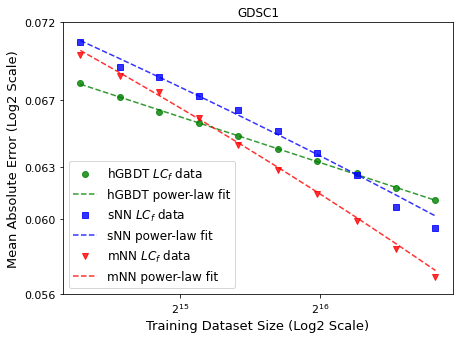

In [21]:
ax = None
fit_method = 'old'
# fit_method = 'new'

# -----------------------------
# dGBDT (LGBM default HPs)
# -----------------------------
if lgb_dft is not None:
    aa = dfit_lgb_dft
    name = lgb_dft_label
    color = 'm'
    pnts_args.update({'marker': '>'})

    xf = aa['tr_size'].values
    yf = aa['y'].values
    
    cc_lgb_dft = None
    prms_lgb_dft = None
    
    if fit_method == 'new':
        cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        xf_plot, yf_plot = cc.calc_fit( x1=xf[0], x2=xf[-1] )
        cc_lgb_dft = cc
    else:
        # Old fit method (see single single_src.ipynb)  
        prms_lgb_dft = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_lgb_dft)
        xf_plot = xf
    
    gof_lgb_dft = calc_gof(yf, yf_plot)
    gof_lgb_dft['model'] = 'dGBDT'
    # Don't plot!
    # ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} data')
    # ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} fit')

# -----------------------------
# hGBDT (LGBM HPO)
# -----------------------------
if lgb_hpo is not None:
    aa = dfit_lgb_hpo    
    name = lgb_hpo_label
    color = 'g'
    pnts_args.update({'marker': 'o'})

    xf = aa['tr_size'].values
    yf = aa['y'].values

    cc_lgb_hpo = None
    prms_lgb_hpo = None
    
    if fit_method == 'new':
        cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        # xf_plot, yf_plot = cc.calc_fit( x1=xf[0], x2=xf[-1] )
        xf_plot, yf_plot = cc.calc_fit( x=xf )
        cc_lgb_hpo = cc
    else:    
        # Old fit method (see single single_src.ipynb) 
        prms_lgb_hpo = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_lgb_hpo)
        xf_plot = xf
        
    gof_lgb_hpo = calc_gof(yf, yf_plot)
    gof_lgb_hpo['model'] = 'hGBDT'
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$ data')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit') 

# -----------------------------    
# sNN (NN0)
# -----------------------------
if nn0 is not None:
    aa = dfit_nn0    
    name = nn0_label
    color = 'b'
    pnts_args.update({'marker': 's'})
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    
    cc_nn0 = None
    prms_nn0 = None
    
    if fit_method == 'new':
        cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        # xf_plot, yf_plot = cc_nn0.calc_fit( x1=xf[0], x2=xf[-1] )
        xf_plot, yf_plot = cc.calc_fit( x=xf )
        cc_nn0 = cc
    else:
        # Old fit method (see single single_src.ipynb)  
        prms_nn0 = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_nn0)
        xf_plot = xf
        
    gof_nn0 = calc_gof(yf, yf_plot)
    gof_nn0['model'] = 'sNN'
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$ data')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit')

# -----------------------------    
# mNN (NN1)
# -----------------------------
if nn1 is not None:
    aa = dfit_nn1    
    name = nn1_label
    color = 'r'
    pnts_args.update({'marker': 'v'})
    
    xf = aa['tr_size'].values
    yf = aa['y'].values
    
    cc_nn1 = None
    prms_nn1 = None
    
    if fit_method == 'new':
        cc = FitPwrLaw(xf=xf, yf=yf, w=aa['w'].values, **startParams)  # new!
        # xf_plot, yf_plot = cc_nn1.calc_fit( x1=xf[0], x2=xf[-1] )
        xf_plot, yf_plot = cc.calc_fit( x=xf )
        cc_nn1 = cc        
    else:
        # Old fit method (see single single_src.ipynb) 
        prms_nn1 = fit_params(x=xf, y=yf)
        yf_plot = biased_powerlaw(xf, **prms_nn1)
        xf_plot = xf
    
    gof_nn1 = calc_gof(yf, yf_plot)
    gof_nn1['model'] = 'mNN'
    ax = lc_plots.plot_lc(x=xf, y=yf, ax=ax, **pnts_args, color=color, label=f'{name} ' + '$LC_{f}$ data')
    ax = lc_plots.plot_lc(x=xf_plot, y=yf_plot, ax=ax, **fit_args, color=color, label=f'{name} power-law fit')


ax.set_title(f'{src}')
ax.legend(frameon=True, fontsize=12, loc='best')
ax.grid(False)
plt.savefig(outpath/f'{src}_fits.png', dpi=dpi)

## Calc gof

In [22]:
# Calc gof
gof_df = pd.DataFrame([gof_lgb_dft, gof_lgb_hpo, gof_nn0, gof_nn1])
gof_df = gof_df[['model', 'rmse', 'mae', 'r2']]
gof_df.insert(loc=0, column='dataset', value=src, allow_duplicates=True)
gof_df.to_csv(outpath/f'gof_{src}.csv', index=False)
display(gof_df)

,dataset,model,rmse,mae,r2
0,GDSC1,dGBDT,0.000053,0.000041,0.998887
1,GDSC1,hGBDT,0.000051,0.000035,0.999469
2,GDSC1,sNN,0.000364,0.000264,0.989208
3,GDSC1,mNN,0.000217,0.000202,0.997308


## Estimated power-law params

In [23]:
# Estimated power-law params
df_list = []

if prms_lgb_dft is not None:
    # prms_lgb_dft['model'] = 'dGDBT'
    prms_lgb_dft_df = pd.DataFrame([prms_lgb_dft])
    prms_lgb_dft_df['model'] = 'dGDBT'
    df_list.append(prms_lgb_dft_df)

if prms_lgb_hpo is not None:
    # prms_lgb_hpo['model'] = 'hGDBT'
    prms_lgb_hpo_df = pd.DataFrame([prms_lgb_hpo])
    prms_lgb_hpo_df['model'] = 'hGDBT'
    df_list.append(prms_lgb_hpo_df)

if prms_nn0 is not None:
    # prms_nn0['model'] = 'sNN'
    prms_nn0_df = pd.DataFrame([prms_nn0])
    prms_nn0_df['model'] = 'sNN'
    df_list.append(prms_nn0_df)

if prms_nn1 is not None:
    # prms_nn1['model'] = 'mNN'
    prms_nn1_df = pd.DataFrame([prms_nn1])
    prms_nn1_df['model'] = 'mNN'
    df_list.append(prms_nn1_df)

df_prms = pd.concat(df_list, axis=0).reset_index(drop=True)
df_prms = df_prms[['model', 'alpha', 'beta', 'gamma']]
df_prms.insert(loc=0, column='dataset', value=src, allow_duplicates=True)
display(df_prms)
df_prms.to_csv(outpath/f'prms_{src}.csv', index=False)

,dataset,model,alpha,beta,gamma
0,GDSC1,dGDBT,1.858714,-0.610376,0.065023
1,GDSC1,hGDBT,0.124858,-0.060691,-0.000462
2,GDSC1,sNN,5.463903,-0.001118,-5.332963
3,GDSC1,mNN,20.595807,-0.000358,-20.452696


## Extrapolate

In [24]:
def inv_powerlaw(y, prms):
    vv = ((y - prms['gamma']) / prms['alpha'] ) ** (1/prms['beta'])
    if np.isnan(vv) == False:
        vv = int(vv)
    return vv

In [25]:
def get_score_at_2mK(dfit, prms):
    x_a = 2 * dfit['tr_size'].values[-1]
    return biased_powerlaw(x_a, **prms)

In [26]:
red_percent = 0.9

dGBDT = {}
dGBDT['model'] = 'dGBDT'
dGBDT['m_func_s'] = inv_powerlaw(red_percent * dfit_lgb_dft['y'].values[-1], prms_lgb_dft)
dGBDT['s2T'] = get_score_at_2mK(dfit_lgb_dft, prms_lgb_dft)

hGBDT = {}
hGBDT['model'] = 'hGBDT'
hGBDT['m_func_s'] = inv_powerlaw(red_percent * dfit_lgb_hpo['y'].values[-1], prms_lgb_hpo)
hGBDT['s2T'] = get_score_at_2mK(dfit_lgb_hpo, prms_lgb_hpo)

nn0 = {}
nn0['model'] = 'sNN'
nn0['m_func_s'] = inv_powerlaw(red_percent * dfit_nn0['y'].values[-1], prms_nn0)
nn0['s2T'] = get_score_at_2mK(dfit_nn0, prms_nn0)

nn1 = {}
nn1['model'] = 'mNN'
nn1['m_func_s'] = inv_powerlaw(red_percent * dfit_nn1['y'].values[-1], prms_nn1)
nn1['s2T'] = get_score_at_2mK(dfit_nn1, prms_nn1)

df_ext = pd.DataFrame([dGBDT, hGBDT, nn0, nn1])

In [27]:
display(df_ext)
display(df_improve)

,model,m_func_s,s2T
0,dGBDT,NaN,0.066010
1,hGBDT,648331.0,0.058532
2,sNN,347175.0,0.056013
3,mNN,262810.0,0.052138


,dataset,tr_size,model,sK,Ds
0,GDSC1,115863,dGBDT,0.066553,NaN
1,GDSC1,115863,hGBDT,0.061068,8.24
2,GDSC1,115863,sNN,0.059532,10.55
3,GDSC1,115863,mNN,0.056904,14.50


In [28]:
dff = df_ext.merge(df_improve, on='model')
dff = dff[['dataset', 'model', 'tr_size', 'sK', 'Ds', 's2T', 'm_func_s']]
dff

,dataset,model,tr_size,sK,Ds,s2T,m_func_s
0,GDSC1,dGBDT,115863,0.066553,NaN,0.066010,NaN
1,GDSC1,hGBDT,115863,0.061068,8.24,0.058532,648331.0
2,GDSC1,sNN,115863,0.059532,10.55,0.056013,347175.0
3,GDSC1,mNN,115863,0.056904,14.50,0.052138,262810.0


In [29]:
dff['s2T_impv'] = None
dff['m_factor'] = None

for m in dff['model'].values:
    # Percent improvement as compared to sK
    s_k = dff.loc[ dff['model']==m, 'sK' ]
    s_2k = dff.loc[ dff['model']==m, 's2T' ]
    vv = np.around((s_k - s_2k)/s_k * 100, 7)
    dff.loc[dff['model']==m, 's2T_impv'] = vv
    
    # The required data size as a factor of mK
    if np.isnan( dff.loc[ dff['model']==m, 'm_func_s' ] ).values[0] == False:
        dff.loc[dff['model']==m, 'm_factor'] = dff.loc[ dff['model']==m, 'm_func_s' ] / dff.loc[ dff['model']==m, 'tr_size' ]
        
dff = dff[['dataset', 'model', 'tr_size', 'sK', 'Ds', 's2T', 's2T_impv', 'm_func_s', 'm_factor']]
display(dff)

dff.to_csv(outpath/f'Table2_{src}.csv', index=False)

,dataset,model,tr_size,sK,Ds,s2T,s2T_impv,m_func_s,m_factor
0,GDSC1,dGBDT,115863,0.066553,NaN,0.066010,0.81536,NaN,None
1,GDSC1,hGBDT,115863,0.061068,8.24,0.058532,4.15231,648331.0,5.59567
2,GDSC1,sNN,115863,0.059532,10.55,0.056013,5.91039,347175.0,2.99643
3,GDSC1,mNN,115863,0.056904,14.50,0.052138,8.3746,262810.0,2.26828
